In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataB.csv')
df.drop(df.columns[0], axis = 1, inplace=True)
df.loc[:, df.columns != 'gnd'] = StandardScaler().fit_transform(df.loc[:, df.columns != 'gnd'])
s = df.drop('gnd', axis=1).values

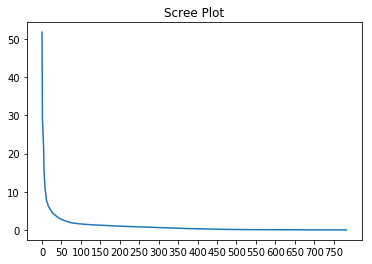

In [3]:
plt.plot(PCA().fit(s).explained_variance_)
plt.xticks(np.arange(0, 800, 50))
plt.title("Scree Plot")
plt.show()

<Figure size 432x288 with 0 Axes>

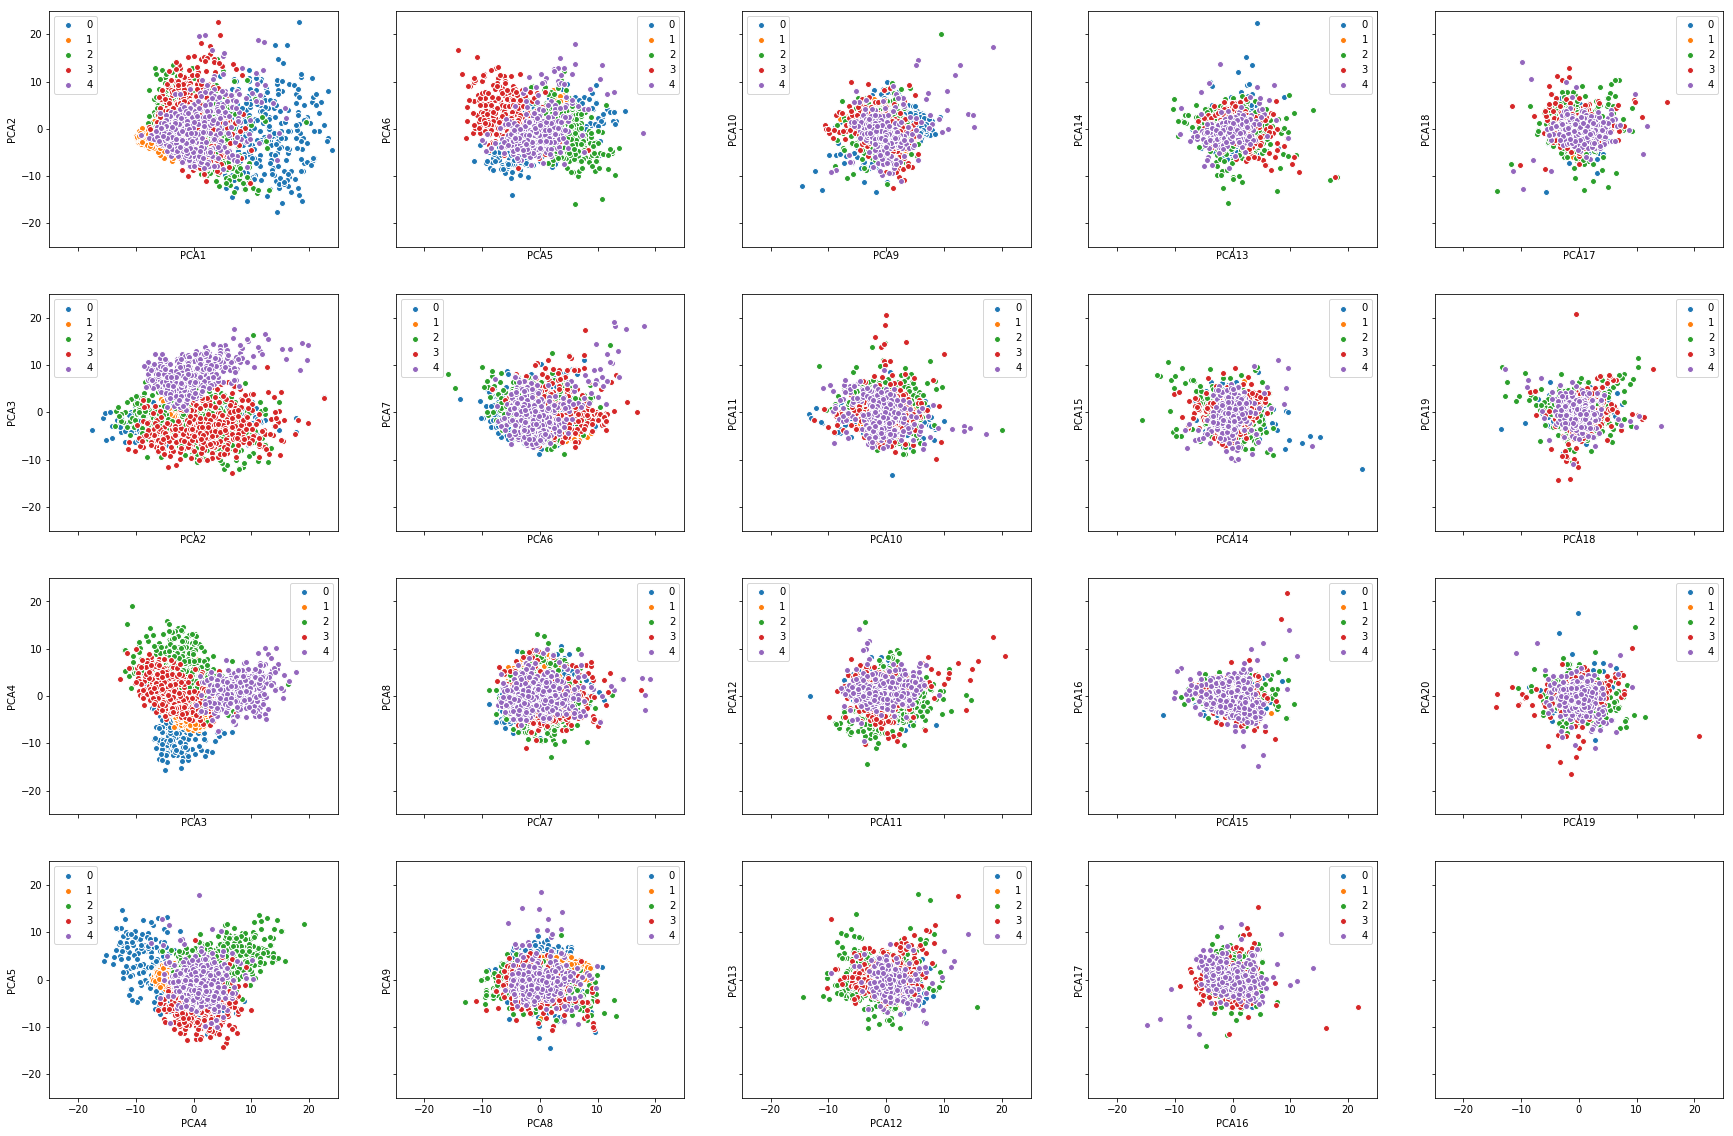

In [4]:
def plotTop(df2, label, total, row, l):
    f = plt.figure()
    f, axes = plt.subplots(nrows = row, ncols = total//row + 1, figsize=(30,20), sharex=True, sharey = True)
    for j in range(total):
        axes[j%row, j//row].set_xlabel(label + str(j+1))
        axes[j%row, j//row].set_ylabel(label + str(j+2))
        [axes[j%row, j//row].scatter(df2.loc[df2['gnd'] == i, j], df2.loc[df2['gnd'] == i, j + 1], edgecolors='w') for i in [*range(5)]]
        axes[j%row, j//row].set_xlim(-1 * l, l)
        axes[j%row, j//row].set_ylim(-1 * l, l)
        axes[j%row, j//row].legend([*range(5)])
    f.savefig(label + 'Top' + str(total) + '.png', dpi = 400)
    
pcaDf = pd.DataFrame(data = PCA(n_components=20).fit_transform(s), columns = [*range(20)])
pcaDf['gnd'] = df[['gnd']]
plotTop(pcaDf, 'PCA', 19, 4, 25)

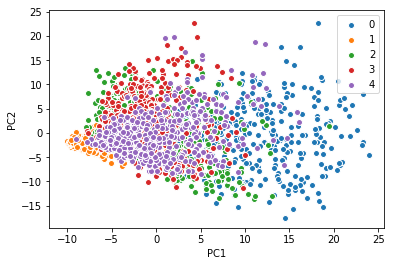

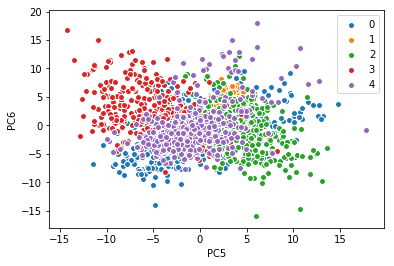

In [5]:
pcaDf = pd.DataFrame(data = PCA(n_components=6).fit_transform(df.drop('gnd', axis=1).values))
pcaDf['gnd'] = df[['gnd']]
for j in [[0, 1], [4, 5]]:
    fig, ax = plt.subplots()
    ax.set_xlabel('PC' + str(j[0]+1))
    ax.set_ylabel('PC' + str(j[1]+1))
    [ax.scatter(pcaDf.loc[pcaDf['gnd'] == i, j[0]], pcaDf.loc[pcaDf['gnd'] == i, j[1]], edgecolors='w') for i in [0, 1, 2, 3, 4]]
    ax.legend([0, 1, 2, 3, 4])
    plt.show()

<Figure size 432x288 with 0 Axes>

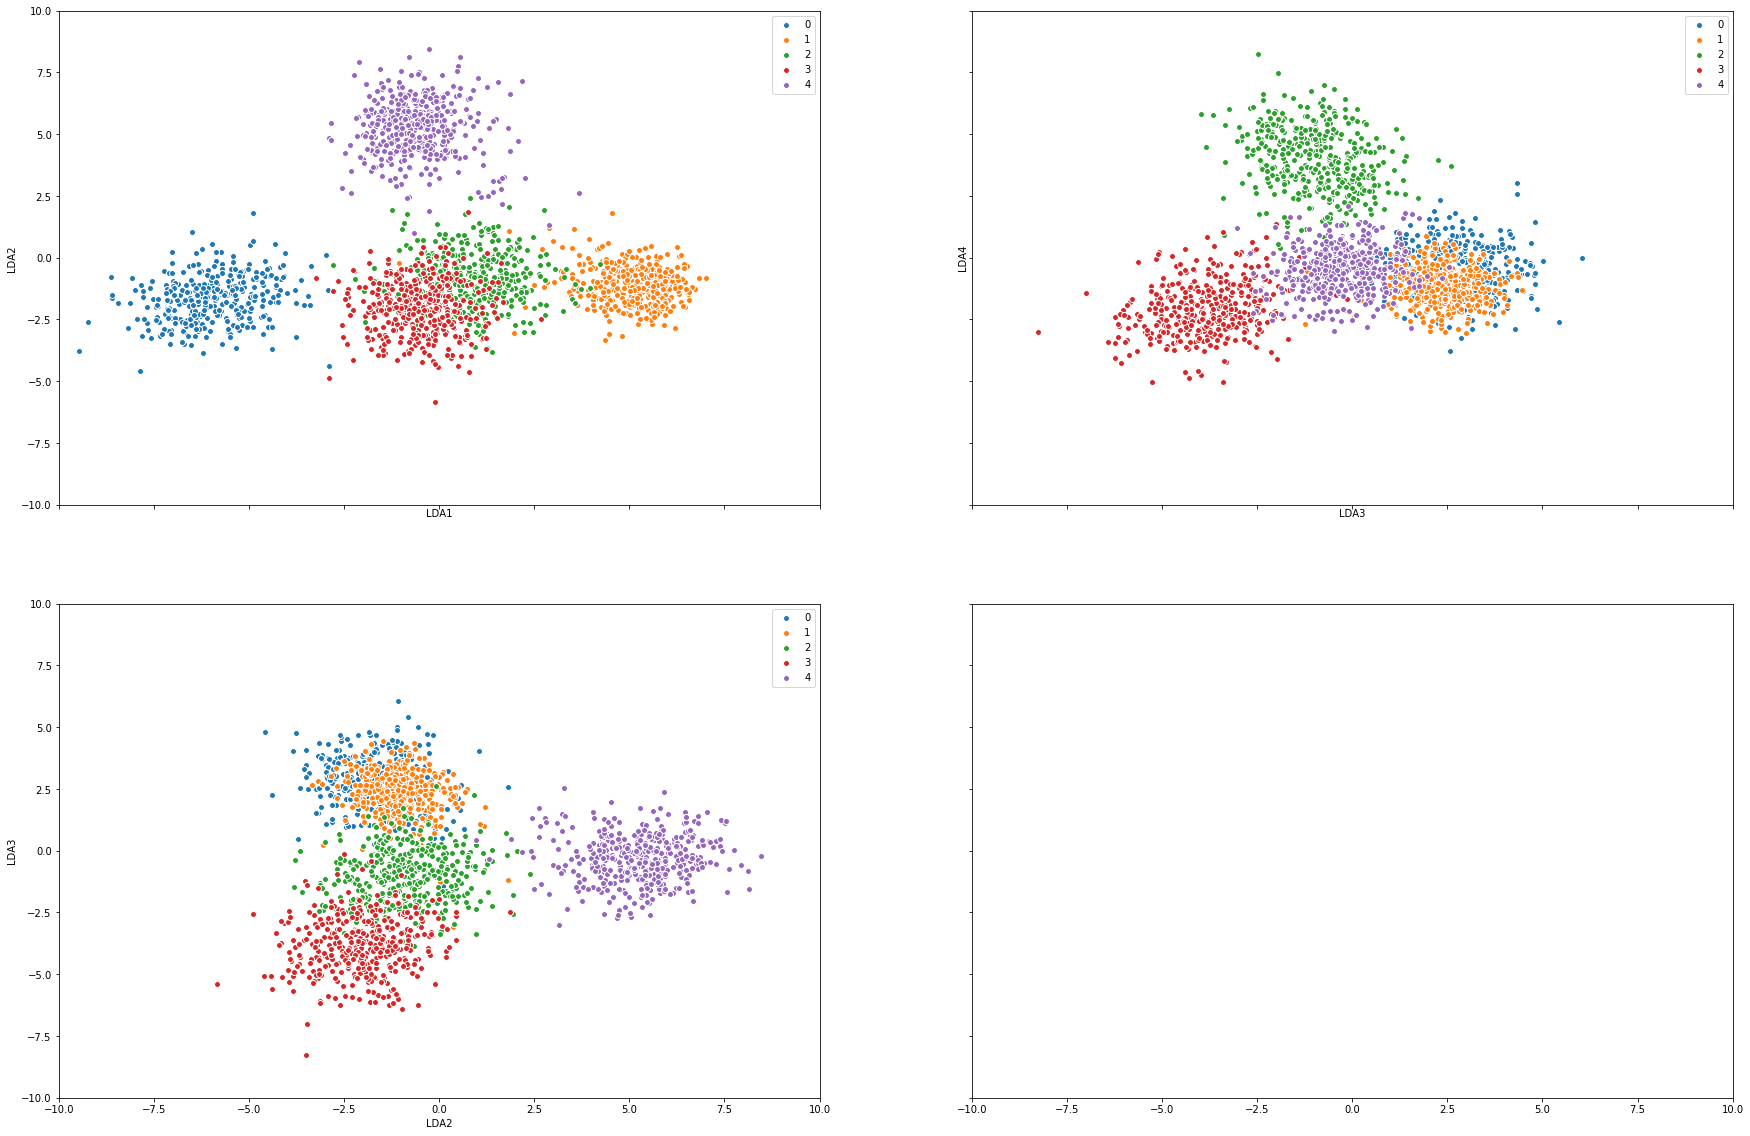

In [6]:
ldaDf = pd.DataFrame(data = LinearDiscriminantAnalysis().fit_transform(s, np.ravel(df[['gnd']])), columns = [*range(4)])
ldaDf['gnd'] = df[['gnd']]
plotTop(ldaDf, 'LDA', 3, 2, 10)

In [7]:
def pca_orig(x):
    eigvalues, eigvectors = np.linalg.eig(np.cov(x, rowvar=False))
    return x.dot(eigvectors[:, eigvalues.argsort()[::-1]])
#     idx = eigvalues.argsort()[::-1]
#     eigvalues, eigvectors = eigvalues[idx], eigvectors[:, idx]
#     return X.dot(eigvectors)

pd.DataFrame(data = pca_orig(s)).head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-9.970692,6.181722,-4.992863,4.394879,2.777870,-2.844761,1.276232,1.463996,6.873987,0.380145,...,-0.100999,0.086302,-0.161476,-0.097294,-0.024377,0.001809,0.018153,0.028466,0.069800,-0.074488
1,-11.416000,6.941587,-5.063029,4.242178,1.844940,-0.146431,1.683401,2.974999,6.208794,1.453125,...,-0.005012,-0.022196,0.067093,-0.155095,0.102904,0.027633,-0.028916,0.228147,0.045595,-0.061478
2,-3.690119,4.693097,-2.908656,-3.935094,6.811806,-3.226107,3.662990,5.408198,3.404675,-3.016744,...,0.075664,0.070065,-0.164278,0.073588,-0.004663,-0.106628,-0.061422,-0.115183,-0.005602,-0.031411
3,-7.312408,6.042886,-3.648012,-3.506919,4.562468,-5.523882,3.971637,4.891807,6.798005,-1.518705,...,-0.041630,0.000102,0.046328,-0.036661,0.013178,-0.148787,-0.146287,0.199255,0.083509,-0.133058
4,-18.061520,1.862436,-4.038834,5.871621,7.322140,4.443076,-2.186078,2.857345,2.555258,1.458920,...,0.014381,-0.132345,0.114057,-0.016582,0.105984,0.008214,-0.022829,-0.022265,-0.010717,-0.134090


In [12]:
def pca_svd(x):
    eigValueU, eigVectorU = np.linalg.eigh(np.dot(x, x.T))
    eigValueV, eigVectorV = np.linalg.eigh(np.dot(x.T, x))
    idxU = eigValueU.argsort()[::-1]
    idxV = eigValueV.argsort()[::-1]
    eigValueU, eigVectorU = eigValueU[idxU], eigVectorU[:,idxU]
    eigValueV, eigVectorV = eigValueV[idxV], eigVectorV[:,idxV]
    
    Vt = eigVectorU.T
    sigma = np.sqrt(eigValueV)
    print(np.diag(sigma).dot(Vt[:784,:]).T)
pca_svd(s)
#     print(np.diag(np.sqrt(eigValueU)).dot(eigVectorV.T[:784,:]).T)

(2066, 784)
[[ 9.97069222e+00 -6.18172201e+00  4.99286326e+00 ... -2.84664097e-02
   6.97997657e-02 -7.44883255e-02]
 [ 1.14159998e+01 -6.94158705e+00  5.06302886e+00 ... -2.28147473e-01
   4.55949595e-02 -6.14775845e-02]
 [ 3.69011918e+00 -4.69309729e+00  2.90865640e+00 ...  1.15182625e-01
  -5.60241248e-03 -3.14112641e-02]
 ...
 [-3.49421529e-01 -9.33681056e-01 -8.10744188e+00 ... -6.93521885e-02
  -8.49495279e-02  1.65756817e-02]
 [-3.11526327e+00 -2.09047425e+00 -6.27251911e+00 ...  1.26995790e-01
   1.46191708e-02 -2.07556239e-03]
 [-5.64409375e+00  2.46166632e-01 -4.14018317e+00 ...  1.57632818e-02
  -1.77113186e-02  1.11643749e-02]]


In [31]:
# input: an n*t array, n is the dimensionality and t is the number of training examples
def svd_np(x):
    eigValueU, eigVectorU = np.linalg.eigh(np.dot(x, x.T))
    eigValueV, eigVectorV = np.linalg.eigh(np.dot(x.T, x))
    idxU = eigValueU.argsort()[::-1]
    idxV = eigValueV.argsort()[::-1]
    return eigVectorU[:,idxU], np.sqrt(eigValueV[idxV] if x.shape[0] > x.shape[1] else eigValueU[idxU]), eigVectorV[:,idxV].T,

U, sigma, Vt = svd_np(s.T)

(2066, 2066)


In [29]:
pd.DataFrame(data = np.diag(sigma).dot(Vt[:s.shape[1],:]).T).head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,9.970692,-6.181722,4.992863,-4.394879,2.777870,2.844761,-1.276232,1.463996,-6.873987,0.380145,...,-0.100999,-0.086302,0.161476,-0.097294,0.024377,-0.001809,0.018153,-0.028466,0.069800,-0.074488
1,11.416000,-6.941587,5.063029,-4.242178,1.844940,0.146431,-1.683401,2.974999,-6.208794,1.453125,...,-0.005012,0.022196,-0.067093,-0.155095,-0.102904,-0.027633,-0.028916,-0.228147,0.045595,-0.061478
2,3.690119,-4.693097,2.908656,3.935094,6.811806,3.226107,-3.662990,5.408198,-3.404675,-3.016744,...,0.075664,-0.070065,0.164278,0.073588,0.004663,0.106628,-0.061422,0.115183,-0.005602,-0.031411
3,7.312408,-6.042886,3.648012,3.506919,4.562468,5.523882,-3.971637,4.891807,-6.798005,-1.518705,...,-0.041630,-0.000102,-0.046328,-0.036661,-0.013178,0.148787,-0.146287,-0.199255,0.083509,-0.133058
4,18.061520,-1.862436,4.038834,-5.871621,7.322140,-4.443076,2.186078,2.857345,-2.555258,1.458920,...,0.014381,0.132345,-0.114057,-0.016582,-0.105984,-0.008214,-0.022829,0.022265,-0.010717,-0.134090


In [30]:
pd.DataFrame(data = (U.T.dot(s.T)).T).head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,9.970692,6.181722,-4.992863,-4.394879,-2.777870,2.844761,-1.276232,-1.463996,6.873987,0.380145,...,-0.100999,0.086302,0.161476,-0.097294,-0.024377,-0.001809,-0.018153,-0.028466,0.069800,0.074488
1,11.416000,6.941587,-5.063029,-4.242178,-1.844940,0.146431,-1.683401,-2.974999,6.208794,1.453125,...,-0.005012,-0.022196,-0.067093,-0.155095,0.102904,-0.027633,0.028916,-0.228147,0.045595,0.061478
2,3.690119,4.693097,-2.908656,3.935094,-6.811806,3.226107,-3.662990,-5.408198,3.404675,-3.016744,...,0.075664,0.070065,0.164278,0.073588,-0.004663,0.106628,0.061422,0.115183,-0.005602,0.031411
3,7.312408,6.042886,-3.648012,3.506919,-4.562468,5.523882,-3.971637,-4.891807,6.798005,-1.518705,...,-0.041630,0.000102,-0.046328,-0.036661,0.013178,0.148787,0.146287,-0.199255,0.083509,0.133058
4,18.061520,1.862436,-4.038834,-5.871621,-7.322140,-4.443076,2.186078,-2.857345,2.555258,1.458920,...,0.014381,-0.132345,-0.114057,-0.016582,0.105984,-0.008214,0.022829,0.022265,-0.010717,0.134090
